# First model exploration

In this notebook, 150 scenarios will be sampled via Latin Hypercube sampling and a pairplot of all variables will be made to inspect the model.

First the model is imported.

In [14]:
#import relevant variables from the EMA workbench
from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging)
from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench import (Constant, TimeSeriesOutcome, IntegerParameter, RealParameter, BooleanParameter, SequentialEvaluator, MultiprocessingEvaluator, ScalarOutcome, ema_logging, perform_experiments, ArrayOutcome, Policy)
from ema_workbench.connectors import netlogo
from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench import save_results

#import the Netlogo model
import pyNetLogo

__all__ = ['NetLogoLink',
           'NetLogoException']
# import other packages
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import os

C:\Users\kkiim\anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:17: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)


In [6]:
ema_logging.log_to_stderr(ema_logging.INFO)

#Define model outcomes

outcomes = [TimeSeriesOutcome('legal_products_end_user'),
            TimeSeriesOutcome('illegal_EU_products_end_user'),
            TimeSeriesOutcome('NOP_products_end_user')
           ]

#Define the NetLogo model
nl_model = NetLogoModel('NetLogo', wd = os.getcwd(), model_file="Netlogo_model/Crop_protection_products_NL_final.nlogo")
nl_model.run_length = int(396)
nl_model.replications = 50
nl_model.uncertainties = [IntegerParameter('nr_of_PPPs_inspected_upon_visit_trader', 1, 50),
                         IntegerParameter('%_always_comply_end_users', 0, 100),
                         RealParameter('%_always_comply_traders', 0, 100),
                         RealParameter('%_traders_end_user_only', 10, 90),
                         RealParameter('%_coverage_of_disease_crop_combinations_legal_products', 10, 100),
                         IntegerParameter('minimum_profit', 0, 5000),
                         RealParameter('%_avg_chance_to_get_disease', 1, 25 ),
                         RealParameter('fine-to-profit_ratio', 0.05, 2),
                         BooleanParameter('inspect_end_user_only_traders?'),
                         BooleanParameter('inspect_trader_to_trader_only_traders?'),
                         IntegerParameter('Nr_of_inspectors', 0, 10),
                         RealParameter('%_profiling_used', 0, 100),
                         IntegerParameter('nr_of_PPPs_inspected_upon_visit_end_user', 1, 5),
                         IntegerParameter('inspection_chance_NL_border', 0, 50) #original run with 0.05
                         ]

nl_model.outcomes = outcomes
nl_model.constants = [Constant('progression_visualisation?', False),
                     Constant('fixed-seed?', False),
                     Constant('Nr_of_types_of_crops', 5),
                     Constant('Nr_of_types_of_diseases', 2),
                     Constant('Nr_of_end_users', 300),
                     Constant ('Nr_of_traders', 15),
                     Constant('fixed_trust_period', 36),
                     Constant('inspect_end_users?', True)
                 ] 


Next, the scenarios are sampled. The model is sampled over 150 scenarios with Latin Hypercube sampling. 

In [7]:
#Perform the experiments
with MultiprocessingEvaluator(nl_model, n_processes = 8) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=150, uncertainty_sampling=LHS)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 150 scenarios * 1 policies * 1 model(s) = 150 experiments
[MainProcess/INFO] 15 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 45 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 75 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 105 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 135 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [8]:
#Store the data files as pickle objects
a_file = open("Results/data_LHS.pkl", "wb")
pickle.dump(outcomes, a_file)
a_file.close()

experiments.to_pickle("Results/experiments_LHS.pkl")

Take a look at the model results.

In [10]:
#Check the results
opened_results = pd.read_pickle("Results/data_LHS.pkl")
opened_results

{'legal_products_end_user': array([[[0.0000e+00, 5.0000e+00, 8.0000e+00, ..., 2.7630e+03,
          2.7710e+03, 2.7790e+03],
         [0.0000e+00, 9.0000e+00, 1.6000e+01, ..., 2.7590e+03,
          2.7660e+03, 2.7710e+03],
         [0.0000e+00, 7.0000e+00, 1.5000e+01, ..., 2.6880e+03,
          2.6970e+03, 2.7020e+03],
         ...,
         [0.0000e+00, 6.0000e+00, 1.3000e+01, ..., 2.5180e+03,
          2.5210e+03, 2.5270e+03],
         [0.0000e+00, 2.0000e+00, 1.5000e+01, ..., 2.5170e+03,
          2.5220e+03, 2.5250e+03],
         [0.0000e+00, 8.0000e+00, 1.6000e+01, ..., 2.2310e+03,
          2.2360e+03, 2.2390e+03]],
 
        [[0.0000e+00, 3.7000e+01, 8.6000e+01, ..., 1.5743e+04,
          1.5775e+04, 1.5808e+04],
         [0.0000e+00, 4.4000e+01, 9.7000e+01, ..., 1.6781e+04,
          1.6820e+04, 1.6856e+04],
         [0.0000e+00, 5.0000e+01, 1.1600e+02, ..., 1.3485e+04,
          1.3508e+04, 1.3540e+04],
         ...,
         [0.0000e+00, 4.4000e+01, 1.0400e+02, ..., 1.4271e+0

In [11]:
#Check the experiments in which the results were gathered
opened_experiments = pd.read_pickle("Results/experiments_LHS.pkl")
opened_experiments

,%_always_comply_end_users,%_always_comply_traders,%_avg_chance_to_get_disease,%_coverage_of_disease_crop_combinations_legal_products,%_profiling_used,%_traders_end_user_only,Nr_of_inspectors,fine-to-profit_ratio,inspect_end_user_only_traders?,inspect_trader_to_trader_only_traders?,inspection_chance_NL_border,minimum_profit,nr_of_PPPs_inspected_upon_visit_end_user,nr_of_PPPs_inspected_upon_visit_trader,scenario,policy,model
0,22.795280,83.296143,1.161455,30.450591,77.053181,69.149392,3.164943,0.713368,True,True,0.492110,4040.494022,3.061658,24.821329,0,None,NetLogo
1,79.245178,54.498011,15.840506,39.083853,83.510455,69.381191,5.075505,0.271283,False,False,0.268998,1378.237765,2.608382,7.499916,1,None,NetLogo
2,66.476727,21.434956,21.888993,79.555681,40.741310,51.350019,1.581817,0.551125,False,True,0.211297,312.909349,1.132014,8.859640,2,None,NetLogo
3,65.951217,49.394427,7.213911,83.337542,19.401049,36.168268,3.914298,1.995201,True,True,0.183714,3717.932752,2.226327,33.344801,3,None,NetLogo
4,25.765649,13.601574,13.913808,26.057176,14.267270,15.369870,0.570534,1.946459,False,False,0.078942,3165.188184,4.467151,23.574930,4,None,NetLogo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,82.593046,96.366878,2.192341,78.678929,7.121349,34.228428,1.879857,0.933746,False,False,0.102805,3642.921140,4.023260,28.382710,145,None,NetLogo
146,66.990684,12.612002,18.973422,16.876544,99.388831,88.498737,8.508309,1.652740,False,True,0.085205,3079.242392,3.981051,14.944923,146,None,NetLogo
147,59.528220,32.850420,1.713293,27.291890,30.466983,67.851668,4.559472,1.922730,True,True,0.120779,1979.093139,4.059239,27.487416,147,None,NetLogo
148,99.276183,34.145876,4.743157,38.621672,18.489278,20.865940,7.021504,1.034609,False,True,0.349998,2885.933508,1.734786,35.665141,148,None,NetLogo


Because the Netlogo model is stochastic, for every scenario, the model is run 50 times. To be able to plot the average model results per scenario, the average model outcomes need to be calculated and appended to the experiments dataset. 

In [15]:
#Create a function that averages over all the model runs per scenario per type of model outcome 
#(legal, NOP and illegal in the EU products)

def append_outcome_to_dataset(type_of_product):

    #Get the desired model outcome
    products = opened_results.get(type_of_product)
    outcome_list = []
    averaged = []
    
    #Average over the lists in the dictionary to get the average values per scenario 
    for i in products:
        averaged = np.average(i, axis=0)
        last_value = averaged[-1]
        outcome_list.append(last_value)
        
    #Append the average value to the experiments dataframe
    opened_experiments[type_of_product] = outcome_list

In [16]:
#Append the average values of all outcomes of interests to the experiments dataframe
append_outcome_to_dataset("legal_products_end_user")
append_outcome_to_dataset("illegal_EU_products_end_user")
append_outcome_to_dataset("NOP_products_end_user")

In [17]:
#Inspect the experiments + outcomes dataframe
opened_experiments

,%_always_comply_end_users,%_always_comply_traders,%_avg_chance_to_get_disease,%_coverage_of_disease_crop_combinations_legal_products,%_profiling_used,%_traders_end_user_only,Nr_of_inspectors,fine-to-profit_ratio,inspect_end_user_only_traders?,inspect_trader_to_trader_only_traders?,inspection_chance_NL_border,minimum_profit,nr_of_PPPs_inspected_upon_visit_end_user,nr_of_PPPs_inspected_upon_visit_trader,scenario,policy,model,legal_products_end_user,illegal_EU_products_end_user,NOP_products_end_user
0,22.795280,83.296143,1.161455,30.450591,77.053181,69.149392,3.164943,0.713368,True,True,0.492110,4040.494022,3.061658,24.821329,0,None,NetLogo,2622.00,57.20,10.34
1,79.245178,54.498011,15.840506,39.083853,83.510455,69.381191,5.075505,0.271283,False,False,0.268998,1378.237765,2.608382,7.499916,1,None,NetLogo,15340.48,1500.60,2901.00
2,66.476727,21.434956,21.888993,79.555681,40.741310,51.350019,1.581817,0.551125,False,True,0.211297,312.909349,1.132014,8.859640,2,None,NetLogo,23716.48,1456.44,1595.92
3,65.951217,49.394427,7.213911,83.337542,19.401049,36.168268,3.914298,1.995201,True,True,0.183714,3717.932752,2.226327,33.344801,3,None,NetLogo,10137.82,39.64,22.98
4,25.765649,13.601574,13.913808,26.057176,14.267270,15.369870,0.570534,1.946459,False,False,0.078942,3165.188184,4.467151,23.574930,4,None,NetLogo,5163.86,7448.06,4194.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,82.593046,96.366878,2.192341,78.678929,7.121349,34.228428,1.879857,0.933746,False,False,0.102805,3642.921140,4.023260,28.382710,145,None,NetLogo,3931.90,5.70,12.68
146,66.990684,12.612002,18.973422,16.876544,99.388831,88.498737,8.508309,1.652740,False,True,0.085205,3079.242392,3.981051,14.944923,146,None,NetLogo,6892.32,5531.64,4523.40
147,59.528220,32.850420,1.713293,27.291890,30.466983,67.851668,4.559472,1.922730,True,True,0.120779,1979.093139,4.059239,27.487416,147,None,NetLogo,2370.40,117.98,14.34
148,99.276183,34.145876,4.743157,38.621672,18.489278,20.865940,7.021504,1.034609,False,True,0.349998,2885.933508,1.734786,35.665141,148,None,NetLogo,5935.34,136.94,555.02


The average values are now presented as absolute values. As the number of end-users that get diseases on their crops varies per model run, to compare scenarios it is useful to look at the outcome values as percentages. The absolute outcome values will now be translated to the percentage of illegal products in the EU, NOP products and total illegal products out of all products that reach the end-user. 

In [78]:
#Create a function that expresses the outcome of interest as a percentage
def get_percentage(row, outcome_of_interest):
    
    #Retrieve the total products that reach the end user and the value of the outcome of interest
    sum_products = row['legal_products_end_user'] + row['illegal_EU_products_end_user'] + row['NOP_products_end_user']
    product_of_interest = row[outcome_of_interest]
    
    #Return the rounded percentage
    return round (product_of_interest / sum_products * 100, 2)


In [79]:
#Append the percentages
opened_experiments['%_illegal_EU_products_end_user'] = opened_experiments.apply (lambda row: get_percentage(row, 'illegal_EU_products_end_user' ), axis=1)
opened_experiments['%_NOP_products_end_user'] = opened_experiments.apply (lambda row: get_percentage(row, 'NOP_products_end_user' ), axis=1)
opened_experiments['%_illegal_total'] = opened_experiments.apply(lambda row: row['%_illegal_EU_products_end_user'] + row['%_NOP_products_end_user'], axis=1)

In [81]:
#Inspect the results
opened_experiments

,%_always_comply_end_users,%_always_comply_traders,%_avg_chance_to_get_disease,%_coverage_of_disease_crop_combinations_legal_products,%_profiling_used,%_traders_end_user_only,Nr_of_inspectors,fine-to-profit_ratio,inspect_end_user_only_traders?,inspect_trader_to_trader_only_traders?,...,nr_of_PPPs_inspected_upon_visit_trader,scenario,policy,model,legal_products_end_user,illegal_EU_products_end_user,NOP_products_end_user,%_illegal_EU_products_end_user,%_NOP_products_end_user,%_illegal_total
0,22.795280,83.296143,1.161455,30.450591,77.053181,69.149392,3.164943,0.713368,1,1,...,24.821329,0,None,NetLogo,2622.00,57.20,10.34,2.13,0.38,2.51
1,79.245178,54.498011,15.840506,39.083853,83.510455,69.381191,5.075505,0.271283,0,0,...,7.499916,1,None,NetLogo,15340.48,1500.60,2901.00,7.60,14.69,22.29
2,66.476727,21.434956,21.888993,79.555681,40.741310,51.350019,1.581817,0.551125,0,1,...,8.859640,2,None,NetLogo,23716.48,1456.44,1595.92,5.44,5.96,11.40
3,65.951217,49.394427,7.213911,83.337542,19.401049,36.168268,3.914298,1.995201,1,1,...,33.344801,3,None,NetLogo,10137.82,39.64,22.98,0.39,0.23,0.62
4,25.765649,13.601574,13.913808,26.057176,14.267270,15.369870,0.570534,1.946459,0,0,...,23.574930,4,None,NetLogo,5163.86,7448.06,4194.42,44.32,24.96,69.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,82.593046,96.366878,2.192341,78.678929,7.121349,34.228428,1.879857,0.933746,0,0,...,28.382710,145,None,NetLogo,3931.90,5.70,12.68,0.14,0.32,0.46
146,66.990684,12.612002,18.973422,16.876544,99.388831,88.498737,8.508309,1.652740,0,1,...,14.944923,146,None,NetLogo,6892.32,5531.64,4523.40,32.64,26.69,59.33
147,59.528220,32.850420,1.713293,27.291890,30.466983,67.851668,4.559472,1.922730,1,1,...,27.487416,147,None,NetLogo,2370.40,117.98,14.34,4.71,0.57,5.28
148,99.276183,34.145876,4.743157,38.621672,18.489278,20.865940,7.021504,1.034609,0,1,...,35.665141,148,None,NetLogo,5935.34,136.94,555.02,2.07,8.37,10.44


To inspect the model, the model outcomes will be plotted in a seaborn pairplot. For this, first the outcome variables will be made into a categorical variable, to be able to colour seaborn plot according to the percentages of illegal products that reach the end-user. The seaborn plot will be made for the total illegal plant protection products reaching the end-user.

In [101]:
#Create a function to provide a categorical variable to the outcomes of interest. 
def make_outcome_categorical(row):
    
    if row['%_illegal_total'] <= 15:
        return 0
    if row['%_illegal_total'] > 15 and row['%_illegal_total'] <= 30 :
        return 1
    if row['%_illegal_total'] > 30 and row['%_illegal_total'] <= 45 :
        return 2
    if row['%_illegal_total'] > 45:
        return 3


In [102]:
#Drop the columns that are not interesting to check with the seaborn plot.
opened_experiments = opened_experiments.drop(["scenario", "policy", 'inspect_end_user_only_traders?', 'fine-to-profit_ratio', 'inspection_chance_NL_border', 'inspect_trader_to_trader_only_traders?', 'inspect_end_user_only_traders?', "model", 'legal_products_end_user', 'illegal_EU_products_end_user', 'NOP_products_end_user', '%_illegal_EU_products_end_user', '%_NOP_products_end_user'], axis = 1)

#Make the percentage of the total illegal plant protection products categorical
opened_experiments['%_illegal_total'] = opened_experiments.apply(lambda row: make_outcome_categorical(row), axis=1)
opened_experiments

,%_always_comply_end_users,%_always_comply_traders,%_avg_chance_to_get_disease,%_coverage_of_disease_crop_combinations_legal_products,%_profiling_used,%_traders_end_user_only,Nr_of_inspectors,minimum_profit,nr_of_PPPs_inspected_upon_visit_end_user,nr_of_PPPs_inspected_upon_visit_trader,%_illegal_total
0,22.795280,83.296143,1.161455,30.450591,77.053181,69.149392,3.164943,4040.494022,3.061658,24.821329,0
1,79.245178,54.498011,15.840506,39.083853,83.510455,69.381191,5.075505,1378.237765,2.608382,7.499916,1
2,66.476727,21.434956,21.888993,79.555681,40.741310,51.350019,1.581817,312.909349,1.132014,8.859640,0
3,65.951217,49.394427,7.213911,83.337542,19.401049,36.168268,3.914298,3717.932752,2.226327,33.344801,0
4,25.765649,13.601574,13.913808,26.057176,14.267270,15.369870,0.570534,3165.188184,4.467151,23.574930,3
...,...,...,...,...,...,...,...,...,...,...,...
145,82.593046,96.366878,2.192341,78.678929,7.121349,34.228428,1.879857,3642.921140,4.023260,28.382710,0
146,66.990684,12.612002,18.973422,16.876544,99.388831,88.498737,8.508309,3079.242392,3.981051,14.944923,3
147,59.528220,32.850420,1.713293,27.291890,30.466983,67.851668,4.559472,1979.093139,4.059239,27.487416,0
148,99.276183,34.145876,4.743157,38.621672,18.489278,20.865940,7.021504,2885.933508,1.734786,35.665141,0


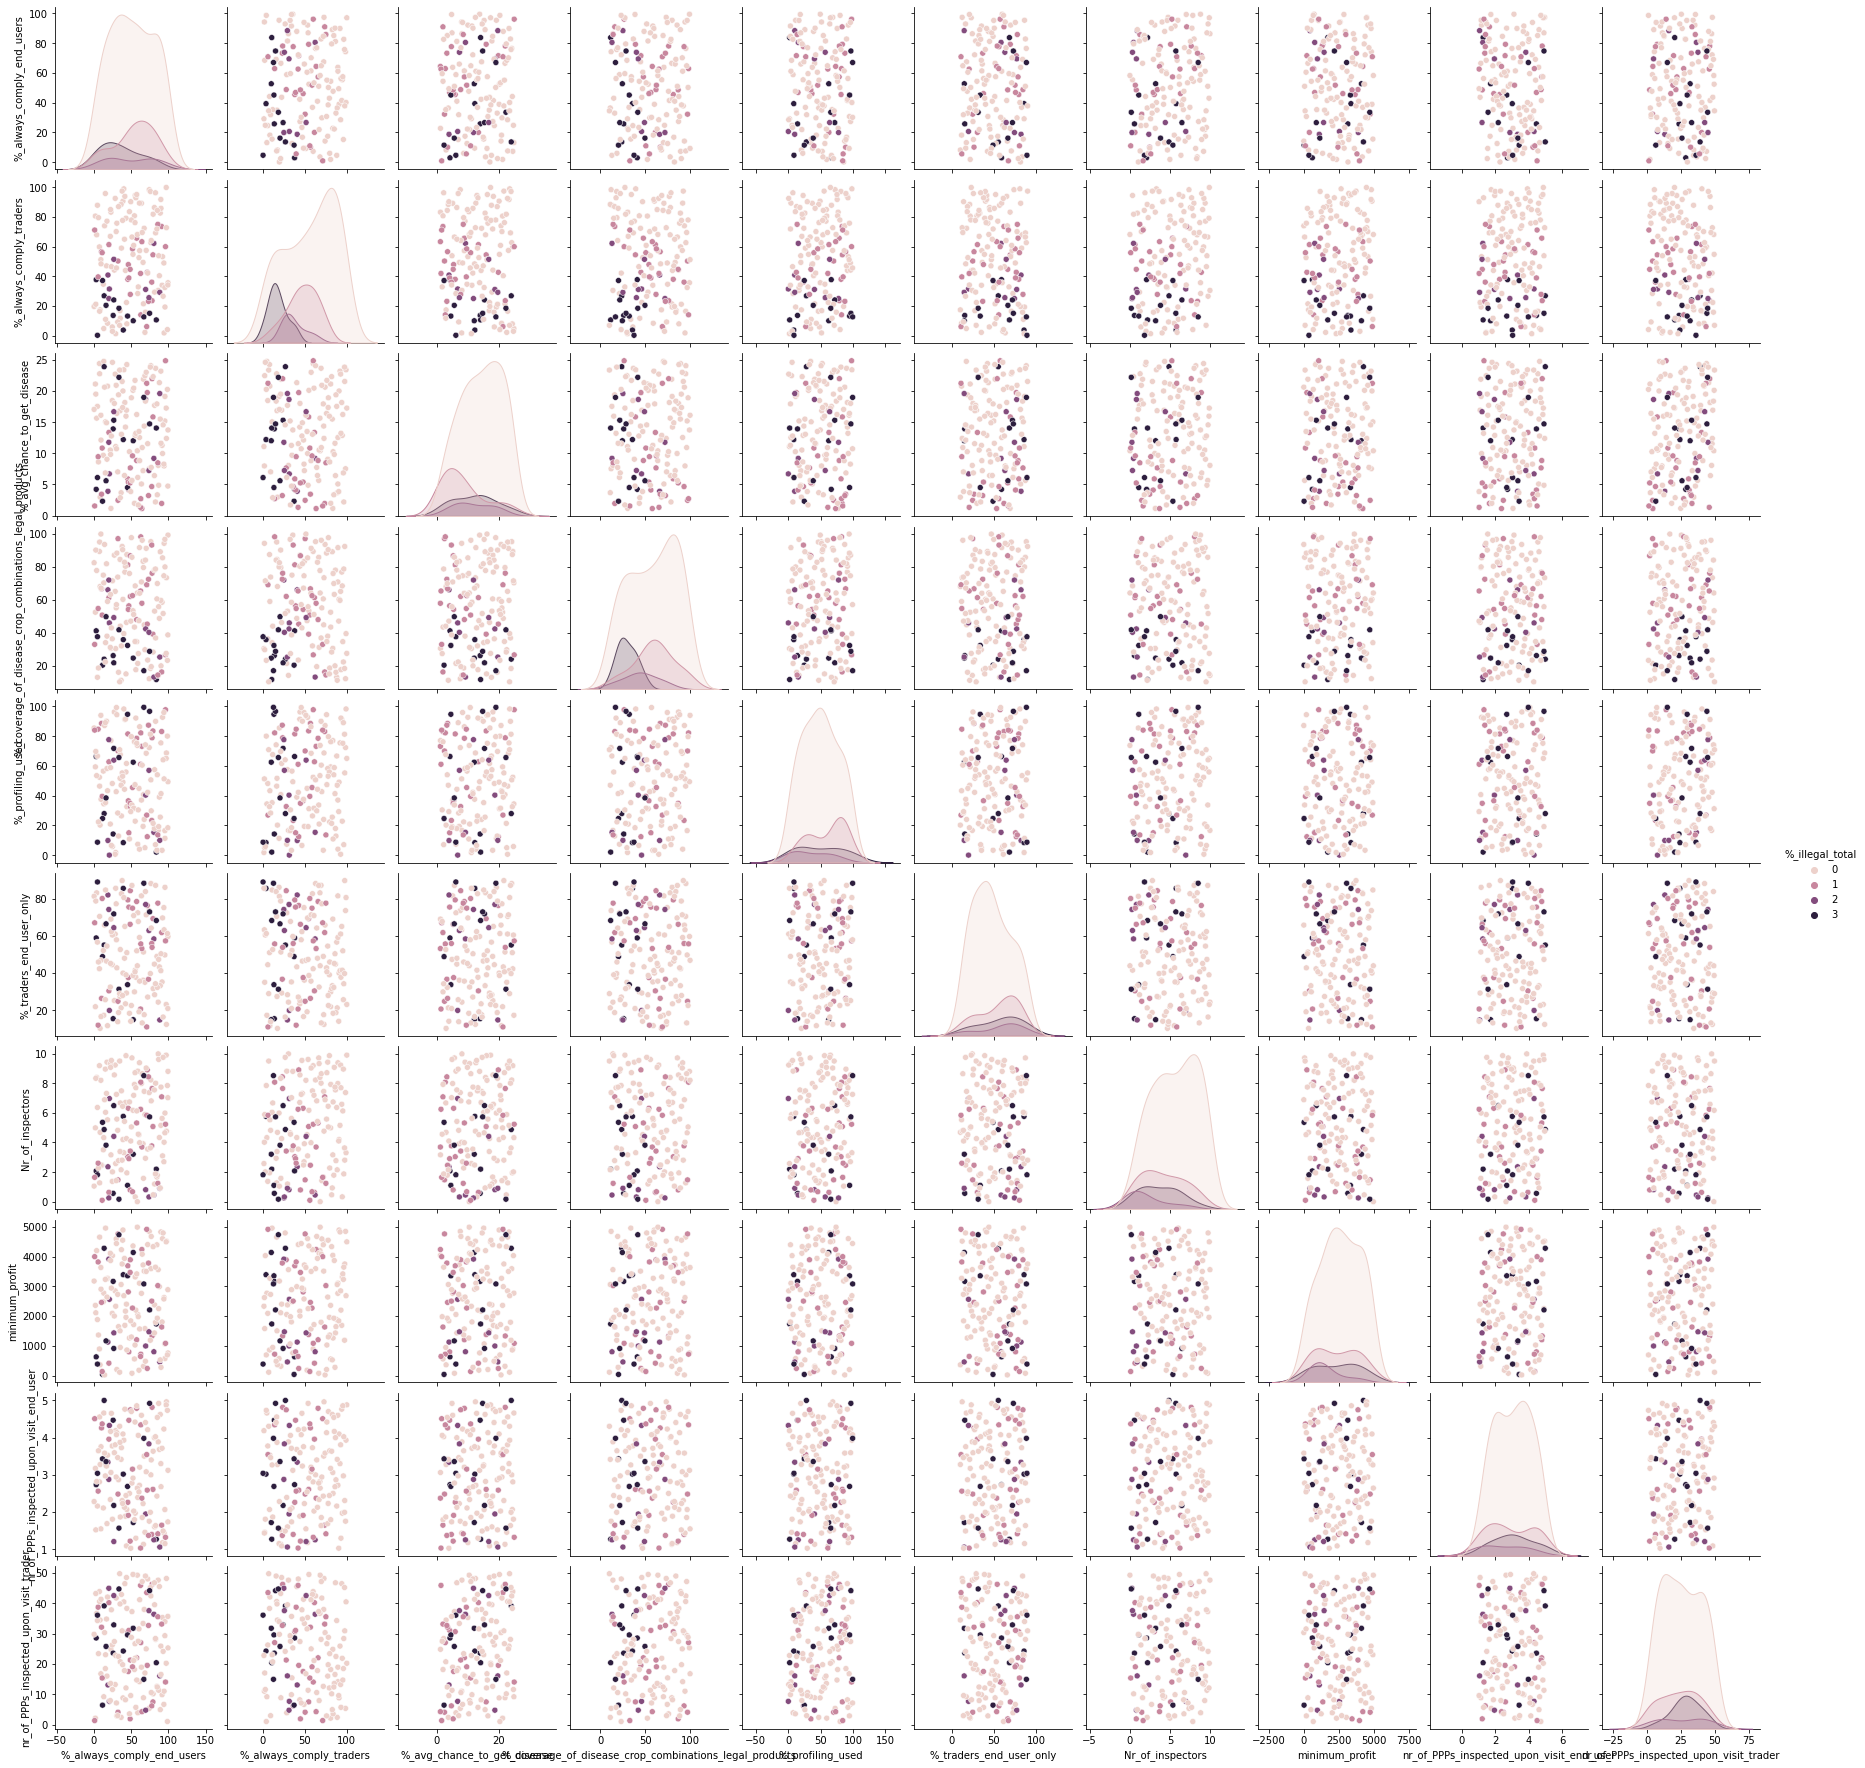

In [103]:
#Create a seaborn plot
sns.pairplot(copy_opened_experiments, hue = '%_illegal_total', kind="scatter")